# Importações

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [50]:
df = pd.read_csv('../df_teste_5000.csv', delimiter=';')

In [51]:
pd.__version__

'1.5.0'

In [52]:
df.head()

,MONTH,INDICE_CONDICOES_ECONOMICAS_ATUAIS,IPCA_INDICE_GERAL,IPCA_TAXA_VARIACAO,PIB,TAXAS_DESEMPREGO,uf,tcb,sr,cliente,...,cnae_subclasse,porte,modalidade,origem,indexador,numero_de_operacoes,vencido_acima_de_15_dias_refatorada,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
0,1,105.78,5331.42,0.21,617747.2,3.2,AC,Bancário,S1,PF,...,-,PF - Mais de 1 a 2 salários mínimos,PF - Outros créditos,Com destinação específica,Prefixado,8,Adimplente,1063.22,0.00,0.00
1,1,105.78,5331.42,0.21,617747.2,3.2,AC,Bancário,S1,PJ,...,PJ - Comércio varejista de produtos alimentíci...,PJ - Médio,PJ - Capital de giro rotativo,Sem destinação específica,Prefixado,8,Inadimplente,82277.18,0.00,0.00
2,1,105.78,5331.42,0.21,617747.2,3.2,AC,Não bancário,S4,PF,...,-,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,Prefixado,95,Inadimplente,87590.65,2966.47,2966.47
3,1,105.78,5331.42,0.21,617747.2,3.2,AL,Bancário,S1,PJ,...,PJ - Atividades de rádio,PJ - Pequeno,PJ - Financiamento de infraestrutura/desenvolv...,Com destinação específica,Pós-fixado,8,Adimplente,30602.94,0.00,0.00
4,1,105.78,5331.42,0.21,617747.2,3.2,AL,Bancário,S2,PJ,...,PJ - Comércio varejista de medicamentos veteri...,PJ - Médio,PJ - Operações com recebíveis,Sem destinação específica,Prefixado,8,Adimplente,127421.30,0.00,0.00


In [53]:
from sklearn.feature_selection import f_regression
x_data, y_data = df.loc[:, df.columns != 'vencido_acima_de_15_dias_refatorada'], df.loc[:, df.columns == 'vencido_acima_de_15_dias_refatorada']

## Número de variáveis originais de x

In [54]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MONTH                               5006 non-null   int64  
 1   INDICE_CONDICOES_ECONOMICAS_ATUAIS  5006 non-null   float64
 2   IPCA_INDICE_GERAL                   5006 non-null   float64
 3   IPCA_TAXA_VARIACAO                  5006 non-null   float64
 4   PIB                                 5006 non-null   float64
 5   TAXAS_DESEMPREGO                    5006 non-null   float64
 6   uf                                  5006 non-null   object 
 7   tcb                                 5006 non-null   object 
 8   sr                                  4988 non-null   object 
 9   cliente                             5006 non-null   object 
 10  ocupacao                            5006 non-null   object 
 11  cnae_secao                          5006 no

## Dummizar x e y

In [55]:
x_data_dummy = pd.get_dummies(data=x_data, drop_first=True)
y_data_dummy = pd.get_dummies(data=y_data, drop_first=True)
x_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Columns: 941 entries, MONTH to indexador_Índices de preços
dtypes: float64(8), int64(2), uint8(931)
memory usage: 4.8 MB


In [56]:
y_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Data columns (total 1 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   vencido_acima_de_15_dias_refatorada_Inadimplente  5006 non-null   uint8
dtypes: uint8(1)
memory usage: 5.0 KB


In [57]:
f_statistic, p_values = f_regression(x_data_dummy, y_data_dummy.values.ravel())
f_statistic

array([2.18615796e+01, 1.81416365e+01, 1.64653043e+01, 1.71588138e+01,
       1.63919166e+01, 2.08409661e+01, 2.89201497e+01, 7.33583994e+00,
       6.70229251e+01, 2.60771846e+01, 1.67823731e+00, 2.15410241e-02,
       3.01333511e+00, 9.27821686e-02, 5.28232006e+00, 1.59906634e+00,
       4.90568249e-01, 2.85558828e-02, 5.01166099e+00, 1.01778620e+00,
       1.31567768e-04, 1.02118395e+00, 6.63275674e-01, 3.70469771e-01,
       6.12008949e+00, 5.55081512e-01, 1.94451015e-03, 6.91074185e+00,
       8.90934764e-01, 3.77866878e-03, 4.58897326e+00, 9.62188299e+00,
       7.80914002e+00, 4.24308927e-01, 2.35168183e-02, 8.05487486e-01,
       2.84368636e+01, 1.27369981e+01, 4.94037697e-02, 4.28552084e+01,
       6.99415776e+00, 3.44149916e+00, 4.71144043e+02, 3.21532612e+01,
       4.17739914e+01, 8.89260116e+01, 9.33745475e+00, 5.50436966e+01,
       4.19765551e+01, 5.96596911e+01, 5.18651895e+01, 1.06106261e+00,
       1.21900020e+01, 1.21487397e+01, 2.50175309e+00, 3.63054102e-02,
      

In [58]:
p_values

array([3.00747205e-006, 2.08829951e-005, 5.03036429e-005, 3.49479226e-005,
       5.22826285e-005, 5.10999854e-006, 7.88538162e-008, 6.78230262e-003,
       3.37446667e-016, 3.40203800e-007, 1.95218595e-001, 8.83320576e-001,
       8.26437694e-002, 7.60682226e-001, 2.15840606e-002, 2.06094467e-001,
       4.83706494e-001, 8.65815380e-001, 2.52209305e-002, 3.13093484e-001,
       9.90848683e-001, 3.12287197e-001, 4.15444639e-001, 5.42775942e-001,
       1.33983390e-002, 4.56283782e-001, 9.64829162e-001, 8.59413601e-003,
       3.45269691e-001, 9.50986662e-001, 3.22264069e-002, 1.93343277e-003,
       5.21805421e-003, 5.14824680e-001, 8.78126924e-001, 3.69500926e-001,
       1.01062056e-007, 3.61853851e-004, 8.24113096e-001, 6.48489083e-011,
       8.20315850e-003, 6.36367504e-002, 6.45932080e-100, 1.50471788e-008,
       1.12197679e-010, 6.10959395e-021, 2.25700485e-003, 1.37738899e-013,
       1.01243255e-010, 1.35312598e-014, 6.82812513e-013, 3.03022739e-001,
       4.84612569e-004, 4

In [59]:
pd.options.display.max_seq_items = 2000
x_data_dummy_fs = x_data_dummy.filter(x_data_dummy.columns[np.where(p_values <= .05)[0]], axis=1)

In [60]:
x_data_dummy_fs.head()

,MONTH,INDICE_CONDICOES_ECONOMICAS_ATUAIS,IPCA_INDICE_GERAL,IPCA_TAXA_VARIACAO,PIB,TAXAS_DESEMPREGO,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,...,modalidade_PJ - Capital de giro,modalidade_PJ - Comércio exterior,modalidade_PJ - Financiamento de infraestrutura/desenvolvimento/projeto e outros créditos,modalidade_PJ - Investimento,modalidade_PJ - Operações com recebíveis,modalidade_PJ - Outros créditos,modalidade_PJ - Rural e agroindustrial,origem_Sem destinação específica,indexador_Prefixado,indexador_Pós-fixado
0,1,105.78,5331.42,0.21,617747.2,3.2,8,1063.22,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
1,1,105.78,5331.42,0.21,617747.2,3.2,8,82277.18,0.00,0.00,...,0,0,0,0,0,0,0,1,1,0
2,1,105.78,5331.42,0.21,617747.2,3.2,95,87590.65,2966.47,2966.47,...,0,0,0,0,0,0,0,1,1,0
3,1,105.78,5331.42,0.21,617747.2,3.2,8,30602.94,0.00,0.00,...,0,0,1,0,0,0,0,0,0,1
4,1,105.78,5331.42,0.21,617747.2,3.2,8,127421.30,0.00,0.00,...,0,0,0,0,1,0,0,1,1,0


In [61]:
# fazer nova previsão somente com essas features selecionadas, fazer também para alpha = 0.1

In [62]:
print(f'Y normal: {y_data.head()}\nY Dummizado: {y_data_dummy.head()}')

Y normal:   vencido_acima_de_15_dias_refatorada
0                          Adimplente
1                        Inadimplente
2                        Inadimplente
3                          Adimplente
4                          Adimplente
Y Dummizado:    vencido_acima_de_15_dias_refatorada_Inadimplente
0                                                 0
1                                                 1
2                                                 1
3                                                 0
4                                                 0


In [63]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_data_dummy_fs, y_data_dummy, test_size=.3, random_state=2)
print(f"Totais de observações: {len(x_treino) + len(x_teste)}\nx_treino: {len(x_treino)}\ny_treino: {len(y_treino)}\nx_teste: {len(x_teste)}\ny_teste: {len(y_teste)}")

Totais de observações: 5006
x_treino: 3504
y_treino: 3504
x_teste: 1502
y_teste: 1502


In [64]:
modelo_simples = LogisticRegression(multi_class='ovr')
modelo_simples.fit(x_treino, y_treino.values.ravel())

LogisticRegression(multi_class='ovr')

In [65]:
y_predicoes, y_prob_pred = modelo_simples.predict(x_teste), modelo_simples.predict_proba(x_teste)[:, 1]

In [66]:
y_teste.rename(columns={'vencido_acima_de_15_dias_refatorada_Inadimplente': 'Inadimplente'}, inplace=True)
y_predicoes = pd.DataFrame(data={'Inadimplente':y_predicoes})

In [67]:
y_predicoes, y_teste = pd.from_dummies(y_predicoes, default_category='Adimplente'), pd.from_dummies(y_teste, default_category='Adimplente')

In [72]:
y_predicoes.rename(columns={'': 'vencido_acima_de_15_dias_refatorada_Inadimplente'}, inplace=True)
y_teste.rename(columns={'': 'vencido_acima_de_15_dias_refatorada_Inadimplente'}, inplace=True)

In [73]:
y_predicoes.head(), y_teste.head()

(  vencido_acima_de_15_dias_refatorada_Inadimplente
 0                                       Adimplente
 1                                     Inadimplente
 2                                       Adimplente
 3                                     Inadimplente
 4                                       Adimplente,
   vencido_acima_de_15_dias_refatorada_Inadimplente
 0                                     Inadimplente
 1                                     Inadimplente
 2                                       Adimplente
 3                                     Inadimplente
 4                                       Adimplente)

In [76]:
y_predicoes.describe(), y_teste.describe()

(       vencido_acima_de_15_dias_refatorada_Inadimplente
 count                                              1502
 unique                                                2
 top                                          Adimplente
 freq                                               1152,
        vencido_acima_de_15_dias_refatorada_Inadimplente
 count                                              1502
 unique                                                2
 top                                          Adimplente
 freq                                                988)

In [86]:
modelo_simples.classes_ = np.array(['Adimplente', 'Inadimplente'])

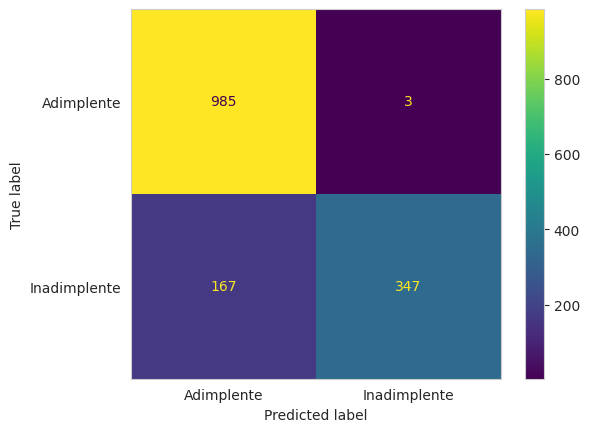

In [87]:
confusionmatrix = confusion_matrix(y_teste, y_predicoes, labels=modelo_simples.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=modelo_simples.classes_)
display.plot()
plt.grid(False)
plt.show()

In [88]:
classificacoes = classification_report(y_teste, y_predicoes, output_dict=True)
print(classification_report(y_teste, y_predicoes))
print(f'Acurácia: {classificacoes["accuracy"]*100:>11.2f}%\nSensitividade: {classificacoes["Inadimplente"]["recall"]*100:6.2f}%\nEspecificidade: {classificacoes["Adimplente"]["recall"]*100:.2f}%')

              precision    recall  f1-score   support

  Adimplente       0.86      1.00      0.92       988
Inadimplente       0.99      0.68      0.80       514

    accuracy                           0.89      1502
   macro avg       0.92      0.84      0.86      1502
weighted avg       0.90      0.89      0.88      1502

Acurácia:       88.68%
Sensitividade:  67.51%
Especificidade: 99.70%


In [89]:
print(y_prob_pred)

[0.13305862 1.         0.12434424 ... 0.12578807 0.13965528 0.14548958]


In [91]:
y_teste

,vencido_acima_de_15_dias_refatorada_Inadimplente
0,Inadimplente
1,Inadimplente
2,Adimplente
3,Inadimplente
4,Adimplente
...,...
1497,Adimplente
1498,Adimplente
1499,Inadimplente
1500,Adimplente


In [92]:
fpr, tpr, thresholds = roc_curve(y_teste, y_prob_pred, pos_label='Inadimplente')

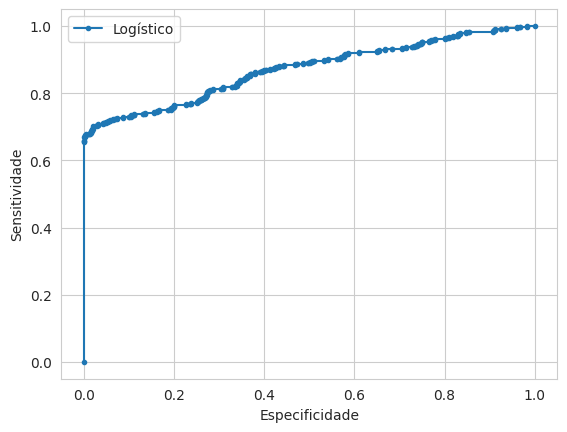

In [93]:
plt.plot(fpr, tpr, marker='.', label='Logístico')
plt.xlabel('Especificidade')
plt.ylabel('Sensitividade')
plt.legend()
plt.show()